In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from insertion_sort import insertion_sort
from selection_sort import selection_sort
from heap_sort import heap_sort
from quick_sort import quick_sort
from merge_sort import merge_sort
from bucket_sort import bucket_sort

In [3]:
def measure_times(a_sort, power_range=(2, 12), n_loop=200, max_int=10000, duplication=False, is_sorted=False, num_swaps=0):
    times = []
    for p in power_range:
        n = 2**p
        
        print("n=" + str(n) + " started...", end="")
        
        if duplication:
            # each array has 100 same values on average
            arrays = [list(np.random.randint(0, (n//100)+1, n)) for _ in range(n_loop)] 
        else:
            arrays = [list(np.random.randint(0, max_int+1, n)) for _ in range(n_loop)]
        
        if is_sorted:
            for array in arrays:
                array.sort()
            if num_swaps != 0:
                for array in arrays:
                    for _ in range(num_swaps):
                        i1, i2 = np.random.choice(n, 2)
                        array[i1], array[i2] = array[i2], array[i1]
                        
        start_time = time.time()
        for array in arrays:
            a_sort(array)
        averaged_time = (time.time() - start_time) / n_loop
        times.append(averaged_time)
        print("finished! time: " + str(averaged_time * 1000) + " ms.")
    
    return times

In [4]:
# preparation for fitting
from scipy.optimize import curve_fit
def n1_func(n, a):
    return a * n
def n2_func(n, a):
    return a * n**2
def nlogn_func(n, a):
    return a * n * np.log2(n)

In [5]:
power_range = range(8, 15)
ns = np.array([2**p for p in power_range])
n_loop = 50
max_int = 10000

sorts = [
    {
        'label': 'selection',
        'sort': selection_sort,
        'color': '#DA0017',
        'marker': 'o',
        'fit_func': n2_func
    },
    {
        'label': 'insertion',
        'sort': insertion_sort,
        'color': '#2C6AAB',
        'marker': '^',
        'fit_func': n2_func
    },
    {
        'label': 'heap',
        'sort': heap_sort,
        'color': '#40A43A',
        'marker': 'v',
        'fit_func': nlogn_func
    },
    {
        'label': 'quick',
        'sort': quick_sort,
        'color': '#863693',
        'marker': 's',
        'fit_func': nlogn_func
    },
    {
        'label': 'merge',
        'sort': merge_sort,
        'color': '#FE6B06',
        'marker': '*',
        'fit_func': nlogn_func
    },
    {
        'label': 'bucket',
        'sort': bucket_sort,
        'color': '#754239',
        'marker': '+',
        'fit_func': n1_func
    }
]

In [6]:
times_all = {}
for sort in sorts:
    print(sort['label'])
    times_all[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop)

selection
n=256 started...finished! time: 3.5143184661865234 ms.
n=512 started...finished! time: 11.80837631225586 ms.
n=1024 started...finished! time: 49.84764099121094 ms.
n=2048 started...finished! time: 202.06151962280273 ms.
n=4096 started...finished! time: 818.3641624450684 ms.
n=8192 started...finished! time: 3312.1819400787354 ms.
n=16384 started...finished! time: 13303.676042556763 ms.
insertion
n=256 started...finished! time: 4.656558036804199 ms.
n=512 started...finished! time: 21.094279289245605 ms.
n=1024 started...finished! time: 85.12791633605957 ms.
n=2048 started...finished! time: 370.9462261199951 ms.
n=4096 started...finished! time: 1518.7958240509033 ms.
n=8192 started...finished! time: 5825.133500099182 ms.
n=16384 started...finished! time: 24712.962760925293 ms.
heap
n=256 started...finished! time: 1.4266204833984375 ms.
n=512 started...finished! time: 3.4064817428588867 ms.
n=1024 started...finished! time: 7.826781272888184 ms.
n=2048 started...finished! time: 17

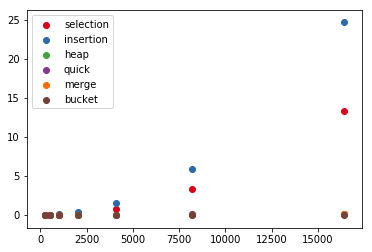

In [7]:
# linear plot
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'])
plt.legend()

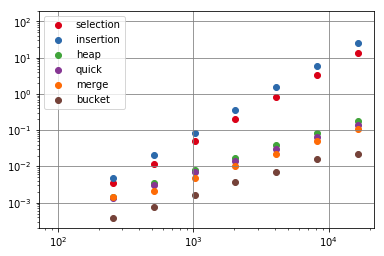

In [8]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-4, 200)
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [9]:
ns_fit = []
for p in power_range:
    for pp in range(10):
        ns_fit.append(2**(p+0.1*pp))
        
fit_params = {}
for sort in sorts:
    fit_params[sort['label']], _ = curve_fit(sort['fit_func'], ns, times_all[sort['label']])

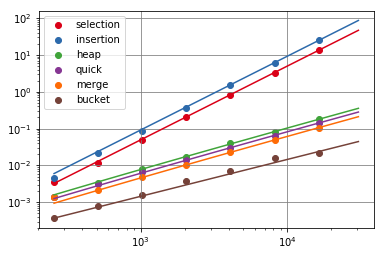

In [10]:
# log plot with fitting curve
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'])
    plt.plot(ns_fit, sort['fit_func'](np.array(ns_fit), fit_params[sort['label']][0]), color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [ ]:
times_all_duplicate = {}
for sort in sorts:
    print(sort['label'])
    times_all_duplicate[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, duplication=True)

selection
n=256 started...finished! time: 3.1452226638793945 ms.
n=512 started...finished! time: 11.763219833374023 ms.
n=1024 started...finished! time: 46.14311695098877 ms.
n=2048 started...finished! time: 194.53684329986572 ms.
n=4096 started...finished! time: 813.5954999923706 ms.
n=8192 started...finished! time: 3286.498441696167 ms.
n=16384 started...

In [ ]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_duplicate[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [ ]:
times_all_sorted = {}
for sort in sorts:
    print(sort['label'])
    times_all_sorted[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, is_sorted=True)

In [ ]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_sorted[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [ ]:
times_all_sorted_swaped = {}
for sort in sorts:
    print(sort['label'])
    times_all_sorted_swaped[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, is_sorted=True, num_swaps=4)

In [ ]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_sorted_swaped[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-5, 1)
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [ ]:
times_all_num_swaps = {}
for num_swaps in [0, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000]:
    print(num_swaps)
    times_all_num_swaps[num_swaps] = measure_times(insertion_sort, power_range=power_range, n_loop=n_loop, is_sorted=True, num_swaps=num_swaps)

In [ ]:
# log plot
for num_swaps in times_all.keys():
    plt.scatter(ns, times_all_num_swaps[num_swaps], label=num_swaps)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [ ]:
def measure_times_for_small(a_sort, n_range=(2, 12, 2), n_loop=1000, max_int=100):
    times = []
    for n in n_range:
        print("n=" + str(n) + " started...", end="")
        
        arrays = [list(np.random.randint(0, max_int+1, n)) for _ in range(n_loop)]
                        
        start_time = time.time()
        for array in arrays:
            a_sort(array)
        averaged_time = (time.time() - start_time) / n_loop
        times.append(averaged_time)
        print("finished! time: " + str(averaged_time * 1000) + " ms.")
    
    return times

In [ ]:
times_all_small = {}
n_range = range(2, 16, 2)
n_loop = 100000
for sort in sorts:
    print(sort['label'])
    times_all_small[sort['label']] = measure_times_for_small(sort['sort'], n_range=n_range, n_loop=n_loop)

In [ ]:
# linear plot
for sort in sorts:
    plt.scatter(n_range, times_all_small[sort['label']], label=sort['label'], color=sort['color'])
plt.legend()
plt.ylim(0.0, 0.00005)